
#**What is a single layer perceptron?**

 














# **Solving the classification of Iris Dataset : Single Layer Perceptron from Scratch**

1.   List item
2.   List item
**bold text**


Task: To predict the class of the iris flower according to the sepal length, sepal width, petal length and petal width

**What is Iris dataset?**

It is a dataset about classifying three different classes (Setosa, Versicolour, Virginica) of iris flower on the basis of four features such as sepal length, sepal width, petal length and petal width.




In our code, we have 3 classes numerically defined as Setosa : 1, Versicolour : 2, Virginica : 3. We have four 2-featured instances as our input. We have 50 rows of each class, i.e. 150 data rows. We need to predict the class of the iris flower by taking a single layer perceptron with four features.

**What does coding a neural network from scratch imply?**

We do not use inbuilt libraries for machine/ deep learning such as those in scikit-learn, keras or tensor flow.  We use only numpy, pandas, and write functions to make the model, train, fit, predict and evaluate it. 

Let's get started!

## STEP 1. Import the necessary libraries/ functions and get the data ready

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
num_classes=len(np.unique(y))
a=np.zeros((y.shape[0], num_classes))

In [5]:
for i in range(y.shape[0]):
  if y[i] == 0:
    a[i][0] = 1
  elif y[i] == 1:
    a[i][1] = 1
  else:
    a[i][2] = 1

#one hot encoding of the output

In [6]:
X= pd.DataFrame(X,columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(a, columns = ["y0","y1","y2"],dtype="int64")

In [7]:
y.head()

,y0,y1,y2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [8]:
#In our code, we want to integrate the bias terms into the matrix of input value. 
#This way, our weighted sum becomes the following: WX instead of WX + b, where b #is a separate, bias vector

#Inserting a new column into the pandas dataframe where every elemnt is 1, in the first position
X.insert(0,"bias", np.ones(X.shape[0]), True)
X

,bias,sepal_length,sepal_width,petal_length,petal_width
0,1.0,5.1,3.5,1.4,0.2
1,1.0,4.9,3.0,1.4,0.2
2,1.0,4.7,3.2,1.3,0.2
3,1.0,4.6,3.1,1.5,0.2
4,1.0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,1.0,6.7,3.0,5.2,2.3
146,1.0,6.3,2.5,5.0,1.9
147,1.0,6.5,3.0,5.2,2.0
148,1.0,6.2,3.4,5.4,2.3


## STEP 2: Write the feed forward function that predicts the outcome using the weights and inputs

This function is used to predict the activated output at a layer, and is called for each instance of X (corresponds to each row in the X matrix). It thus takes in a row of the input features (= the vector of feature values for that instance) and the updated weights as its parameter.

In [9]:
def softmax(x): 

    """Compute softmax values for each sets of scores in x.""" 

    e_x = np.exp(x - np.max(x)) 

    return e_x / e_x.sum(axis=0) 

  #the softmax gives the output in the form of probability

In [10]:
def predict(instance ,weights ):
  #Initializing a variable to hold the value of the weighted sum (of input features and the corresponding weights) 
  weighted_sum=np.zeros((1,3)) 
  
  ##print("instance in predict(p1,p2):",instance)
  ##print("weights in predict(p1,p2):",weights)
  
  #calculating the weighted sum of the instance features and the corresponding weights as a dot product
  weighted_sum=np.dot(instance,weights)
  
  ##print("weighted_sum in predict(p1,p2):",weighted_sum)
  
  #Step activation function - maps non-negative inputs (function inputs, the weighted sum here) to 1 and negative inputs to 0. 
  #Using an if statement for the step activation function
  a = softmax(weighted_sum)
  
  ##print ("softmax of weighted sum =",a)
  return a

## STEP 3: Define the function that trains the weight using backpropogation using gradient descent. 

Here, we use stochastic gradient descent which means we we go through all the instances one by one and update the weights after each time an instance is passed in the forward direction. 

**Weight update:**

updated weight = old weight - update in weight

> where:

> update in the weight = learning rate * (desired output - actual (or predicted) output) * input
  
Each of the weights (corresponding to each input feature) gets updated

In [11]:
from math import log
def categorical_cross_entropy(target, predicted):
  sum_score = 0.0
  
  ##print("predicted in CCE=",predicted)
  ##print(predicted[0])
  
  for j in range(len(target)):
    sum_score += target.iloc[j] * log(1e-15 + predicted[j])
  return sum_score



In [12]:
#np.ones((X.shape[1], y.nunique())).shape
y_total=y.to_numpy()
len(np.unique(y_total,axis=0))

3

In [14]:
#learning_rate and epochs are hyperparameters here, that is, we specify their values (we try different values to see which one helps our model train / converge the best)
def train_weights(x,y, learning_rate, epochs):
  #initializing a weight vector (array of 2 dimensions here as there are now 4 neurons) whose length is equal to the number of output features i.e. three
  weights = np.random.randn(x.shape[1], len(np.unique(y_total,axis=0))) #The no. of input features in x is given by the number of columns x has. It can be obtained from the shape. Run x.shape and see what you get.
  
  #We look at the error in predictions for all instances, and do that for each epoch
  for epoch in range(epochs): #for every epoch
    total_error = 0.0 #storing the total error for that epoch
    for index in range(len(x)): #for each instance of x (instance being represented by a matrix) 
      prediction_softmax = predict(x.iloc[index], weights)
      prediction=np.argmax(prediction_softmax,axis=0)
      
      ##print("shape of prediction_softmax and of prediction=",prediction_softmax.shape,prediction.shape)
      ##print("Prediction softmax in train_weights:",prediction_softmax)
      
      error = y.iloc[index,:]-prediction_softmax
      ##print("error shape=",error.shape)
      ##print("type(error)=",type(error))
      total_error += error **2 #sum of squared error
      for j in range(x.shape[1]): 
        #Updating column-wise all the weights (that is, the weight value corresponding to each of the input features) 
        weights[j][0] = weights[j][0] + learning_rate *error[0]* x.iloc[index,j]
        weights[j][1] = weights[j][1] + learning_rate *error[1] * x.iloc[index,j]
        weights[j][2] = weights[j][2] + learning_rate *error[2]* x.iloc[index,j]
    mean_error = total_error/len(x)
    
    ##print(weights)
    
    #printing the epoch number, the learning rate and mean of the total error for that epoch
    print(f'Epochs = {epoch}, learning rate = {learning_rate}, mean categorical cross entropy error = {mean_error}')
  return weights #these are the final, trained weights after running through all the epochs - used in prediction

In [15]:
# https://stats.stackexchange.com/questions/235528/backpropagation-with-softmax-cross-entrop
# ∂E∂wij=yi(oj−tj)y

## STEP 4: Define the function that serves as the model 

This function will call the training and predict functions, and computes the final predicted outcome after running through all the epochs. 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,a_train,a_test = train_test_split(X, y, test_size=0.2, random_state=2275)
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [18]:
y_test=np.argmax(np.array(a_test),axis=1)

In [19]:
#defining the function that calls the training function, and computes the final outcome
def perceptron(x_train, y_train,x_test, learning_rate, epochs):
  y_preds = list() #initializing a variable to hold the predicted values (one prediction for each instance) as a list
  weights = train_weights(x_train, y_train, learning_rate, epochs)
  for i in range(len(x_test)):
    #for each instance/ row of X, getting the prediction and appending it to the list
    prediction_softmax = predict(x_test.iloc[i],weights)
    prediction=np.argmax(prediction_softmax)
    y_preds.append(prediction)
  return y_preds

## STEP 5: Define a function that evaluates the accuracy score

Now that we have predicted the outcome, we need to compute the accuracy of our model. We use a simple accuracy metric in this code, as described below. 

In [20]:
def accuracy_score(y_desired, y_predicted):
  correct = 0
  
  #computing accuracy as the percent correctness of the predictions among the instances
  #Defined here as the %percent of correct predictions out of all the instances the model predicted for
  for i in range(len(y_desired)):
    if y_desired[i] == y_predicted[i]:
      correct += 1
  accuracy_score=correct*100.0/len(y_desired)
  return accuracy_score

### STEP 6: Tune the hyperparameters, run the model, obtain the accuracy score. Repeat for different values of the hyperparameters and see what values give you the best performing model




In [21]:
#Iitializing the hyperparameters
learning_rate = 0.01
epochs = 30

#calling the model, predicting the outcome and measuring the accuracy of the prediction
predicted = perceptron(X_train, a_train, X_test, learning_rate, epochs)
print("predicted")
accuracy = accuracy_score(y_test, predicted)
print("\n")

print(f"The accuracy is {accuracy}%.")

Epochs = 0, learning rate = 0.01, mean categorical cross entropy error = y0    0.463449
y1    0.555841
y2    0.240837
Name: 138, dtype: float64
Epochs = 1, learning rate = 0.01, mean categorical cross entropy error = y0    0.255968
y1    0.381380
y2    0.137809
Name: 138, dtype: float64
Epochs = 2, learning rate = 0.01, mean categorical cross entropy error = y0    0.090766
y1    0.241016
y2    0.128324
Name: 138, dtype: float64
Epochs = 3, learning rate = 0.01, mean categorical cross entropy error = y0    0.036307
y1    0.192912
y2    0.131474
Name: 138, dtype: float64
Epochs = 4, learning rate = 0.01, mean categorical cross entropy error = y0    0.020560
y1    0.174344
y2    0.131571
Name: 138, dtype: float64
Epochs = 5, learning rate = 0.01, mean categorical cross entropy error = y0    0.014089
y1    0.162441
y2    0.129016
Name: 138, dtype: float64
Epochs = 6, learning rate = 0.01, mean categorical cross entropy error = y0    0.010727
y1    0.152934
y2    0.125195
Name: 138, dtype: 

#Creating a simple plot

In [24]:
sepal_length=np.zeros(X.shape[0])
sepal_width=np.zeros(X.shape[0])
#sepal_length

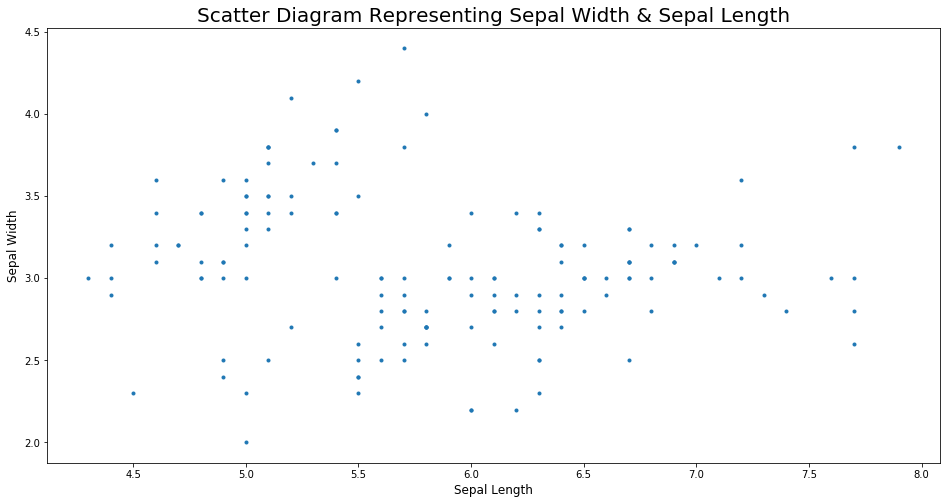

In [26]:
%matplotlib inline
import matplotlib.pyplot as pl

#setting figure size
pl.rcParams['figure.figsize'] = (16, 8)
#plotting scatter diagram using sepal length and sepal width
for k in range(X.shape[0]):
  sepal_length[k] = X.iloc[k][1]
  sepal_width[k] = X.iloc[k][2]
pl.scatter(sepal_length,sepal_width, marker='.')

#setting title and labels
pl.title('Scatter Diagram Representing Sepal Width & Sepal Length', fontsize=20)
pl.xlabel('Sepal Length', fontsize=12)
pl.ylabel('Sepal Width', fontsize=12)

#displaying the diagram
pl.show()


### labelled visualizaton

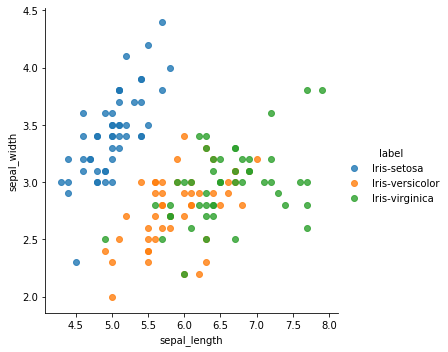

In [76]:
import seaborn as sns

X['label'] = iris.target

labels_dict = {0 : "Iris-setosa",
              1 : "Iris-versicolor",
              2 : "Iris-virginica"}

X['label'] = X['label'].map(labels_dict)

sns.lmplot('sepal_length', 'sepal_width', data=X, hue='label', fit_reg=False)